# feature engineering

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [2]:
X_train = pd.read_csv('data/X_train.csv', index_col='id')
X_test = pd.read_csv('data/X_test.csv', index_col='id')
y_train = pd.read_csv('data/y_train.csv', index_col='id')
y_test = pd.read_csv('data/y_test.csv', index_col='id')

In [3]:
df = X_train.merge(y_train, on='id')

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40095 entries, 58975 to 23269
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gps_height         40095 non-null  int64  
 1   installer          40095 non-null  object 
 2   longitude          40095 non-null  float64
 3   latitude           40095 non-null  float64
 4   num_private        40095 non-null  int64  
 5   basin              40095 non-null  object 
 6   region             40095 non-null  object 
 7   region_code        40095 non-null  int64  
 8   district_code      40095 non-null  int64  
 9   population         40095 non-null  int64  
 10  public_meeting     40095 non-null  object 
 11  scheme_management  40095 non-null  object 
 12  permit             40095 non-null  object 
 13  construction_year  40095 non-null  int64  
 14  extraction_type    40095 non-null  object 
 15  management         40095 non-null  object 
 16  payment           

### converting some categorical features represented as strings from our initial dataset into ternary values to be able to build additional features. 

In [6]:
tern_water_quality = {'soft':0,
                      'salty':1,
                      'unknown': 2,
                      'milky': 3,
                      'coloured':4,
                      'salty abandoned': 5, 
                      'fluoride': 6,
                      'fluoride abandoned': 7
}

tern_region = {'Iringa':0,
               'Shinyanga':1,
               'Mbeya':2,
               'Kilimanjaro':3,
               'Morogoro':4,
               'Arusha':5,
               'Kagera':6,
               'Mwanza':7,
               'Kigoma':8,
               'Ruvuma':9,
               'Pwani':10,
               'Tanga':11,
               'Dodoma':12,
               'Singida':13,
               'Mara':14,
               'Tabora':15,
               'Rukwa':16,
               'Mtwara':17,
               'Manyara':18,
               'Lindi':19,
               'Dar es Salaam':20                                     
}

tern_extraction_type = {'gravity':0,
                        'nira/tanira':1,
                        'other':2,
                        'submersible':3,
                        'swn 80':4,
                        'mono':5,
                        'india mark ii':6,
                        'afridev':7,
                        'ksb':8,
                        'other - rope pump':9,
                        'other - swn 81':10,
                        'windmill':11,
                        'india mark iii':12,
                        'cemo':13,
                        'other - play pump':14,
                        'walimi':15,
                        'climax':16,
                        'other - mkulima/shinyanga':17
}

tern_waterpoint_type = {'communal standpipe':0,
'hand pump':1,
'other':2,
'communal standpipe multiple':3,
'improved spring':4,
'cattle trough':5,
'dam':6
}

tern_source = { 'spring':0,
                'shallow well':1,
                'machine dbh':2,
                'river':3,
                'rainwater harvesting':4,
                'hand dtw':5,
                'lake':6,
                'dam':7,
                'other':8,
                'unknown':9
}

tern_scheme_management = {'VWC':0,
                          'WUG':1,
                          'Water authority':2,
                          'WUA':3,
                          'Water Board':4,
                          'Parastatal':5,
                          'Private operator':6,
                          'Company':7,
                          'Other':8,
                          'SWC':9,
                          'Trust':10,
                          'None':11
}

### creating some additional features as bivariate combinations which could be impactful for our modelling process

In [7]:
df.water_quality = [tern_water_quality[x] for x in df.water_quality]

In [8]:
df.region = [tern_region[x] for x in df.region]

In [9]:
df.extraction_type = [tern_extraction_type[x] for x in df.extraction_type]

In [10]:
df.waterpoint_type = [tern_waterpoint_type[x] for x in df.waterpoint_type]

In [11]:
df.source = [tern_source[x] for x in df.source]

### adding these new features to our dataframe

In [12]:
df['water_quality_by_region'] = df.water_quality * df.region
df['water_quality_by_extraction_type'] = df.water_quality * df.extraction_type
df['water_quality_by_waterpoint_type'] = df.water_quality * df.waterpoint_type
df['water_quality_by_source'] = df.water_quality * df.source
df['water_quality_by_gps_height'] = df.water_quality * df.gps_height

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40095 entries, 58975 to 23269
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gps_height                        40095 non-null  int64  
 1   installer                         40095 non-null  object 
 2   longitude                         40095 non-null  float64
 3   latitude                          40095 non-null  float64
 4   num_private                       40095 non-null  int64  
 5   basin                             40095 non-null  object 
 6   region                            40095 non-null  int64  
 7   region_code                       40095 non-null  int64  
 8   district_code                     40095 non-null  int64  
 9   population                        40095 non-null  int64  
 10  public_meeting                    40095 non-null  object 
 11  scheme_management                 40095 non-null  object 
 12  

In [14]:
cols_to_drop = ['water_quality',
                'region',
                'extraction_type',
                'waterpoint_type',
                'source',
                'gps_height'
]
df = df.drop(cols_to_drop, axis = 1)
df = df.fillna('missing', axis = 1)

In [15]:
df.columns

Index(['installer', 'longitude', 'latitude', 'num_private', 'basin',
       'region_code', 'district_code', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year', 'management',
       'payment', 'quantity', 'status_group', 'water_quality_by_region',
       'water_quality_by_extraction_type', 'water_quality_by_waterpoint_type',
       'water_quality_by_source', 'water_quality_by_gps_height'],
      dtype='object')

In [16]:
x = df.drop('status_group', axis=1)
y = df['status_group']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, stratify=y)

In [18]:
X_train.to_csv('data/X_train_eng.csv')
X_test.to_csv('data/X_test_eng.csv')
y_train.to_csv('data/y_train_eng.csv')
y_test.to_csv('data/y_test_eng.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40095 entries, 58975 to 23269
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   installer                         40095 non-null  object 
 1   longitude                         40095 non-null  float64
 2   latitude                          40095 non-null  float64
 3   num_private                       40095 non-null  int64  
 4   basin                             40095 non-null  object 
 5   region_code                       40095 non-null  int64  
 6   district_code                     40095 non-null  int64  
 7   population                        40095 non-null  int64  
 8   public_meeting                    40095 non-null  object 
 9   scheme_management                 40095 non-null  object 
 10  permit                            40095 non-null  object 
 11  construction_year                 40095 non-null  int64  
 12  

### baseline dummy model after feature engineering

In [20]:
X_train_eng = pd.read_csv('data/X_train_eng.csv', index_col='id')
X_test_eng = pd.read_csv('data/X_test_eng.csv', index_col='id')
y_train_eng = pd.read_csv('data/y_train_eng.csv', index_col='id')
y_test_eng = pd.read_csv('data/y_test_eng.csv', index_col='id')

In [21]:
eng_dummy_model = DummyClassifier(strategy='most_frequent', random_state=42)
eng_dummy_model.fit(X_train_eng, y_train_eng)

DummyClassifier(random_state=42, strategy='most_frequent')

In [22]:
print('Accuracy Score Train:', eng_dummy_model.score(X_train_eng, y_train_eng))
print('Accuracy Score Test:', eng_dummy_model.score(X_test_eng, y_test_eng))

Accuracy Score Train: 0.543613448172658
Accuracy Score Test: 0.5435953711093376


In [23]:
log_loss_eng_dummy = cross_val_score(eng_dummy_model, X_train_eng, y_train_eng, scoring='neg_log_loss')
log_loss_eng_dummy = -log_loss_eng_dummy.mean()
print('Log Loss:', log_loss_eng_dummy)

Log Loss: 15.763033094737816


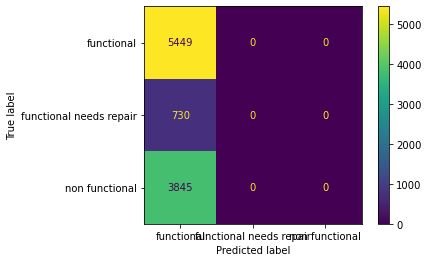

In [24]:
plot_confusion_matrix(eng_dummy_model, X_test_eng, y_test_eng);

In [25]:
y_pred_eng = eng_dummy_model.predict(X_test_eng)
cm = confusion_matrix(y_test_eng, y_pred_eng)
func = cm[0][0] / (cm[0][0] + cm[0][1] + cm[0][2])
func_nr = cm[1][1] / (cm[1][0] + cm[1][1] + cm[1][2])
non_func = cm[2][2] / (cm[2][0] + cm[2][1] + cm[2][2])
print(f'The model correctly predicts {round(func*100, 2)}% of the funtional wells.')
print(f'The model correctly predicts {round(func_nr*100, 2)}% of the funtional-needs-repair wells.')
print(f'The model correctly predicts {round(non_func*100, 2)}% of the non-functional wells.')

The model correctly predicts 100.0% of the funtional wells.
The model correctly predicts 0.0% of the funtional-needs-repair wells.
The model correctly predicts 0.0% of the non-functional wells.
